In [2]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

In [3]:
# apts is the original imported data from kaggle for 2019
apts = pd.read_csv('data/apts_2019_raw.csv', sep=";",encoding="latin1")

In [4]:
apts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [5]:
apts.head(1)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415


Columns to check to see if they are needed/helpful for analysis:  
- (1) check distribution of 'fee' and why is it object when it ought to be boolean.
- (2) check distribution of 'price_type'.
- (3) check distribution of 'source'.
- (4) check distribution of 'category'.
- (5) check distribution of 'has_photo' and why it is object when it ought to be boolean.
- (6) check distribution of 'currency'.
- (7) check distribution of 'price_display'.
- (8) check distribution of 'amenities'.
- (9) check distribution of 'time'.
- (10) check NaNs in bathrooms to see if NaN is meaningful (e.g., actually no bathroom because they are shared ones).
- (11) check NaNs in bedrooms to see if NaN is meaningful (e.g., a studio apartment has no bedroom).
- (12) check NaNs in cityname and state to see if 'body' contains them; extract them if so.
- (13) check ranges in price and square_feet; remove the heavy outliers.
- (14) check the max of bedrooms to see if it is consistent with price and square feet.

In [6]:
# (1) check 'fee'
apts['fee'].unique(), apts['fee'].value_counts()

(array(['No'], dtype=object),
 fee
 No    10000
 Name: count, dtype: int64)

In [7]:
# 'fee' is uniform, therefore, it won't be helpful for our purposes
# drop 'fee' 
apts = apts.drop(columns=['fee'])

In [8]:
# (2) check 'price_type'
apts['price_type'].unique(), apts['price_type'].value_counts()

(array(['Monthly', 'Weekly', 'Monthly|Weekly'], dtype=object),
 price_type
 Monthly           9998
 Weekly               1
 Monthly|Weekly       1
 Name: count, dtype: int64)

In [9]:
# drop the weekly and monthly|weekly since we're after monthly rentals, not weekly and varied
# NOTE: could have converted weekly to monthly, but since it is one sample, I just dropped it
apts = apts[apts['price_type'] == 'Monthly']

In [10]:
# (3) check 'source'
apts['source'].unique()

array(['RentLingo', 'Listanza', 'RentDigs.com', 'ListedBuy', 'GoSection8',
       'RealRentals', 'RENTOCULAR', 'rentbits', 'Home Rentals',
       'Real Estate Agent', 'RENTCafé', 'tenantcloud'], dtype=object)

In [11]:
# drop 'source' column since which website the data comes from isn't required for our purposes
apts = apts.drop(columns=['source'])

In [12]:
# (4) check 'category'
apts['category'].unique(), apts['category'].value_counts()

(array(['housing/rent/apartment', 'housing/rent/home',
        'housing/rent/short_term'], dtype=object),
 category
 housing/rent/apartment     9994
 housing/rent/home             2
 housing/rent/short_term       2
 Name: count, dtype: int64)

In [13]:
# drop the rows where it is a home and short term since we're after apartments only
apts = apts[apts['category'] == 'housing/rent/apartment']

In [14]:
# (5) check 'has_photo'
apts['has_photo'].unique(), apts['has_photo'].value_counts()

(array(['Thumbnail', 'Yes', 'No'], dtype=object),
 has_photo
 Thumbnail    8901
 Yes           909
 No            184
 Name: count, dtype: int64)

Unsure as to what 'Thumbnail' represents in that whether it does contain photos or not, or if it is only a thumbnail. Therefore, I will leave it for now.

In [15]:
# (6) check 'currency'
apts['currency'].unique()

array(['USD'], dtype=object)

In [16]:
# the only value is USD for currency
# we won't need this since we're only dealing with US data
apts = apts.drop(columns=['currency'])

In [17]:
# (7) check 'price_display'
apts['price_display'].unique(), apts['price_display'].value_counts()

(array(['$790', '$425', '$1,390', ..., '$19,500', '$25,000', '$4,790'],
       shape=(1724,), dtype=object),
 price_display
 $1,350    86
 $1,250    81
 $850      79
 $1,100    77
 $1,400    74
           ..
 $1,727     1
 $4,145     1
 $3,245     1
 $1,574     1
 $2,067     1
 Name: count, Length: 1724, dtype: int64)

'price_display' contains the displayed value on the post, with a dollar symbol in front of it. I can use this for checking consistency of price for the 'price' column after removing the $ and , symbols and converting to numeric.

In [18]:
# remove $ and , symbols, and convert to numeric
apts['price_display'] = apts['price_display'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
apts['price_display'] = pd.to_numeric(apts['price_display'])

In [19]:
# compare against price and see how many are equal
mask = apts['price_display'] == apts['price']
num_match = mask.sum()
num_match, apts.shape[0]

(np.int64(9994), 9994)

After removing the symbols and converting to numeric, it is proven that the price display matches the price, so the data is consistent so far.  

Moving forward though, price display won't be needed, so we can now drop it.

In [20]:
apts = apts.drop(columns=['price_display'])

In [21]:
# (8) check 'amenities'
apts['amenities'].unique(), apts['amenities'].value_counts()

(array([nan, 'Dishwasher,Elevator,Patio/Deck,Pool,Storage', 'Refrigerator',
        ...,
        'Cable or Satellite,Dishwasher,Fireplace,Parking,Patio/Deck,Refrigerator,Wood Floors',
        'Elevator,Gym,Parking,Patio/Deck,Pool,Storage,Tennis,View',
        'Basketball,Cable or Satellite,Doorman,Hot Tub,Internet Access,Parking,Playground,Pool,Storage,Washer Dryer'],
       shape=(2252,), dtype=object),
 amenities
 Parking                                                                                                        229
 Dishwasher,Refrigerator                                                                                        225
 Pool                                                                                                           171
 Dishwasher,Parking,Pool                                                                                        149
 Dishwasher                                                                                                     147
 

In [22]:
# based on the apts.info(), there are a lot of NaNs in amenities
# check to see if these NaNs are representing 'no amenities' or actually 'data not provided'
sample = apts[apts['amenities'].isna()].sample(20, random_state=44)
# look in the body description to see if any info is present regarding this
pd.set_option('display.max_colwidth', None) # so it will print full description
sample['body']

3480                                                       This unit is located at 1948 Linwood St Nw, Salem, 97304, ORMonthly rental rates range from $1335 - $1395We have one - two beds units available for rent
4827                                                              This unit is located at 1704 Pleasant Valley Road, Oakland, 94611, CAMonthly rental rates range from $2600We have 1 beds units available for rent
6310                                                             This unit is located at 8655 Datapoint Dr #403, San Antonio, 78229, TXMonthly rental rates range from $1050We have 2 beds units available for rent
466                                                                     This unit is located at 1136 South 29th Street, Omaha, 68105, NEMonthly rental rates range from $615We have studio units available for rent
3694    This unit is located at 4002 Raynor Pkwy, Bellevue, 68123, NEMonthly rental rates range from $883 - $1385We have one - three beds units availabl

In [23]:
pd.reset_option('display.max_colwidth') # reset the display 

After looking up '6454 Simms Street, Arvada, 80004' (one of the samples) in Google to find the apartment building ([link to apt](https://www.rentralstonpark.com/property-details)), I can confirm that NaN represents 'data not provided' because the apartment building contains amenities not listed in the data. So going forward, any exploration using 'amenities' must consider that NaN meaningfully denotes 'data not provided' and/or 'data is missing'.

In [24]:
# (9) check 'time'
apts['time'].unique(), apts['time'].value_counts()

(array([1577359415, 1577017063, 1577359410, ..., 1575112975, 1577362186,
        1577362141], shape=(6304,)),
 time
 1577359489    5
 1577359251    5
 1577016866    5
 1577360145    4
 1577359410    4
              ..
 1577360489    1
 1576667692    1
 1575112975    1
 1577362186    1
 1577362141    1
 Name: count, Length: 6304, dtype: int64)

These are UNIX timestamps, all corresponding to late 2019, which is consistent with the claim that this data is from 2019.

In [25]:
# (10) check 'bathrooms' NaNs
# filter for square feet > 1000 because it is a VERY high likelihood that an apartment bigger than 1000 will have a bathroom
apts[(apts['bathrooms'].isna()) & (apts['square_feet'] > 1000)].tail()

,id,category,title,body,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_type,square_feet,address,cityname,state,latitude,longitude,time
8750,5668638203,housing/rent/apartment,Studio apartment 10 Santa Fe Ave,"This unit is located at ten Santa Fe Ave, Pt. ...",NaN,NaN,0.0,Thumbnail,NaN,3000,Monthly,1400,10 Santa Fe Avenue,Richmond,CA,37.9389,-122.3331,1577360215
8873,5668634793,housing/rent/apartment,Studio apartment 8197 14th Avenue South,This unit is located at 8197 14th Avenue South...,NaN,NaN,0.0,Thumbnail,NaN,1000,Monthly,1440,8197 14th Ave South,Grand Forks,ND,47.9179,-97.0658,1577360007
9489,5668641007,housing/rent/apartment,Studio apartment 625 Stanwix Street,"This unit is located at 625 Stanwix Street, Pi...",NaN,NaN,2.0,Thumbnail,"Cats,Dogs",2835,Monthly,1890,625 Stanwix St,Pittsburgh,PA,40.4448,-79.9725,1577360420
9658,5659918509,housing/rent/apartment,Studio apartment 3503 45th St,"This unit is located at 3503 45th St, Lubbock,...",NaN,NaN,0.0,Thumbnail,NaN,1325,Monthly,2122,3503 45th St,Lubbock,TX,33.5600,-101.8904,1576667778
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,Thumbnail,NaN,4790,Monthly,40000,NaN,New York,NY,40.7716,-73.9876,1577362186


### 

I can assume that if the square footage is sufficiently high enough, there would definitely be a bathroom. From a sample of the NaN bathroom data, we can confirm that NaN truly represents 'data not provided' because, for example, an apartment with 1890 square feet and 2 bedrooms would definitely have a bathroom. If we decide to use bathrooms for any analysis, this will have to be kept in mind.

In [26]:
# (11) check 'bedrooms' NaNs
apts[(apts['bedrooms'].isna())]

,id,category,title,body,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_type,square_feet,address,cityname,state,latitude,longitude,time
486,5544562168,housing/rent/apartment,5115 N 40th St,all utilities included avail 12/20/19 or 1/8/2...,"Cable or Satellite,Garbage Disposal,Pool,Refri...",1.0,NaN,No,NaN,849,Monthly,405,5115 N 40th St,Phoenix,AZ,33.4993,-111.9838,1570656593
1388,5668272551,housing/rent/apartment,bedroom in Medford MA 02155,Medford Walk-In Store Front Commercial Retail ...,NaN,1.0,NaN,Thumbnail,NaN,1200,Monthly,550,110 Central Avenue,Medford,MA,42.4194,-71.1110,1577312344
1790,5509258096,housing/rent/apartment,Apartment for rent in.,"Controlled Access/Gated, Laundry Facilities, A...","AC,Dishwasher,Gated,Refrigerator",1.0,NaN,Thumbnail,NaN,1800,Monthly,594,NaN,Pasadena,CA,34.1683,-118.1209,1568781415
6720,5668640431,housing/rent/apartment,Studio apartment 303-319 Market Street,"This unit is located at 303-319 Market Street,...",NaN,2.0,NaN,Thumbnail,NaN,2050,Monthly,989,303-319 Market St,San Diego,CA,32.7876,-117.1265,1577360384
9138,5668638940,housing/rent/apartment,Studio apartment 606 Spokane Ct,"This unit is located at 606 Spokane Ct, Frankl...",NaN,2.5,NaN,Thumbnail,NaN,1950,Monthly,1575,606 Spokane Court,Franklin,TN,35.9393,-86.8716,1577360274
9505,5668627195,housing/rent/apartment,Studio apartment 11 Calle de Arena,"This unit is located at eleven Calle de Arena,...",NaN,3.0,NaN,Thumbnail,NaN,1100,Monthly,1900,11 Calle DE Arena,Rancho Santa Margarita,CA,33.6340,-117.6061,1577359439


The NaNs are truly representative of 'data not provided' for bedrooms because if there are 3 bathrooms, for example, there would definitely be a bedroom. Also, if an apartment is 1000 square feet, the likelihood of having a bedroom is incredibly high. Therefore, if using bedrooms for analysis, these NaNs will have to be kept in mind.

In [27]:
apts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9994 non-null   int64  
 1   category      9994 non-null   object 
 2   title         9994 non-null   object 
 3   body          9994 non-null   object 
 4   amenities     6445 non-null   object 
 5   bathrooms     9962 non-null   float64
 6   bedrooms      9988 non-null   float64
 7   has_photo     9994 non-null   object 
 8   pets_allowed  5834 non-null   object 
 9   price         9994 non-null   int64  
 10  price_type    9994 non-null   object 
 11  square_feet   9994 non-null   int64  
 12  address       6671 non-null   object 
 13  cityname      9917 non-null   object 
 14  state         9917 non-null   object 
 15  latitude      9984 non-null   float64
 16  longitude     9984 non-null   float64
 17  time          9994 non-null   int64  
dtypes: float64(4), int64(4), object(1

In [28]:
# Remove rows where there are more than 4 NaNs 
mask_nans = apts.isna().sum(axis=1) > 4
apts = apts[~mask_nans]

In [29]:
# (12) check NaNs in cityname and state
# go through 'body' description to get the cityname and state manually for the NaN's in these columns
apts_nans = apts[apts['cityname'].isna()]
pattern = r',\s*(?P<city>[A-Za-z\s]+),\s*(?P<zip>\d{5}),\s*(?P<state>[A-Z]{2})Monthly'
extracted = apts_nans['body'].str.extract(pattern)

In [30]:
apts.loc[extracted.index, 'cityname'] = extracted['city']
apts.loc[extracted.index, 'state']    = extracted['state']

In [31]:
# still some nans left in cityname and state
# regex pattern didn't cover it all
apts_nans1 = apts[apts['cityname'].isna()]
pd.set_option('display.max_colwidth', None)
apts_nans1['body']

739                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       This unit is located at 2530 Marina Drive, N.chesterfield, 23234, VAMonthly rental rates range from $705 - $875We have one - two beds units available for rent
1009                                                                                                                                                                                                           

In [32]:
# missed some of the NaNs due to '.' being there
pattern1 = r',\s*(?P<city>[^,]+),\s*(?P<zip>\d{4,5}),\s*(?P<state>[A-Z]{2})Monthly'
extracted1 = apts_nans1['body'].str.extract(pattern1)

In [33]:
apts.loc[extracted1.index, 'cityname'] = extracted1['city']
apts.loc[extracted1.index, 'state']    = extracted1['state']

In [34]:
# 2 NaNs left because the body doesn't have the cityname and state
# drop them
apts = apts.dropna(subset=['cityname', 'state'])

In [35]:
pd.reset_option('display.max_colwidth') 

In [36]:
# (13) check ranges of square feet and price for removing heavy outliers
sqft = apts['square_feet']
Q1 = sqft.quantile(0.25)
Q3 = sqft.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 3 * IQR
upper = Q3 + 3 * IQR
apts_filter = apts[(sqft >= lower) & (sqft <= upper)]

In [37]:
price = apts_filter['price']
Q1 = price.quantile(0.25)
Q3 = price.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 3 * IQR 
upper = Q3 + 3 * IQR
apts_filter = apts_filter[(price >= lower) & (price <= upper)]

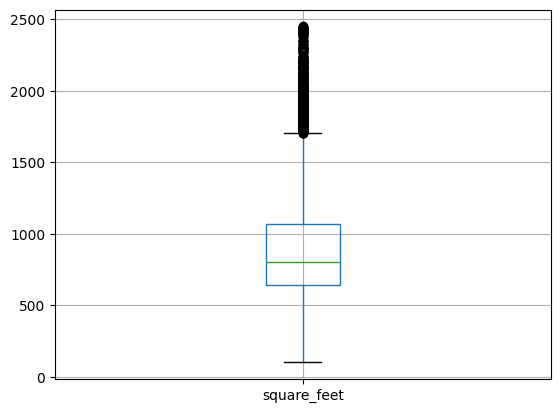

In [38]:
apts_filter.boxplot(column='square_feet');

In [39]:
apts_filter.boxplot(column='price');


In [40]:
# (14) check to see if bedrooms == 6 is consistent with square feet and price
apts_filter[apts_filter['bedrooms'] == 6.0]

,id,category,title,body,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_type,square_feet,address,cityname,state,latitude,longitude,time
9319,5668625061,housing/rent/apartment,Six BR 416 Russell Walk,"This unit is located at 416 Russell Walk, Madi...",Parking,2.0,6.0,Thumbnail,NaN,2125,Monthly,1714,416 Russell Walk,Madison,WI,43.0724,-89.4003,1577359290
9639,5664595036,housing/rent/apartment,Six BR 1131 Route 601,"This unit is located at 1131 Route 601, Skillm...",NaN,2.0,6.0,Thumbnail,"Cats,Dogs",2890,Monthly,2100,1131 Route 601,Skillman,NJ,40.4114,-74.6960,1577016871
9731,5668617816,housing/rent/apartment,Six BR 1425 Harry Rd,"This unit is located at 1425 Harry Rd, Manhatt...","Parking,Refrigerator",3.0,6.0,Thumbnail,"Cats,Dogs",2300,Monthly,2280,1425 Harry Road,Manhattan,KS,39.1984,-96.6052,1577358816
9763,5664594265,housing/rent/apartment,Six BR 905 Buena Vista Drive,"This unit is located at 905 Buena Vista Drive,...",NaN,5.0,6.0,Thumbnail,"Cats,Dogs",2250,Monthly,2354,905 Buena Vista Dr,Tallahassee,FL,30.4601,-84.2714,1577016809


In [41]:
apts = apts_filter.copy()
# final check of stats
apts.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.612000e+03,9582.000000,9606.000000,9612.000000,9612.000000,9612.000000,9612.000000,9.612000e+03
mean,5.622340e+09,1.331820,1.679263,1371.012901,886.275697,37.718739,-94.282323,1.574835e+09
std,7.077210e+07,0.531124,0.856661,605.502995,381.887032,5.511794,15.487934,3.792576e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509240e+09,1.000000,1.000000,930.000000,642.000000,33.634000,-98.557600,1.568780e+09
50%,5.668609e+09,1.000000,2.000000,1250.000000,800.000000,38.857100,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1645.750000,1067.000000,41.387300,-81.864400,1.577359e+09
max,5.668643e+09,5.000000,6.000000,3855.000000,2450.000000,61.594000,-70.191600,1.577362e+09


Everything seems consistent with the cleaning. Can conclude that it is finished. Just ensure to note that if using bedrooms and bathrooms to realize that there are still NaNs but they are kept in case we want to use this data for something other than bedrooms and bathrooms.

In [42]:
apts.head()

,id,category,title,body,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_type,square_feet,address,cityname,state,latitude,longitude,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,Thumbnail,NaN,790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,Thumbnail,NaN,425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,Thumbnail,NaN,1390,Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,Thumbnail,NaN,925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,Thumbnail,NaN,880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,1577359401


In [62]:
# realized that there are too many states (TE is not a state)
# Washington, DC is kept 
apts['state'].unique()

array(['DC', 'IN', 'VA', 'WA', 'NY', 'CA', 'AZ', 'NC', 'TX', 'GA', 'FL',
       'AL', 'MD', 'CO', 'NM', 'IL', 'TN', 'AK', 'MA', 'NJ', 'OR', 'DE',
       'PA', 'IA', 'SC', 'MN', 'MI', 'KY', 'WI', 'OH', 'CT', 'RI', 'NV',
       'UT', 'MO', 'OK', 'NH', 'NE', 'LA', 'ND', 'AR', 'KS', 'ID', 'HI',
       'MT', 'VT', 'SD', 'WV', 'MS', 'ME', 'WY'], dtype=object)

In [56]:
apts[apts['state'] == 'TE']

,id,category,title,body,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_type,square_feet,address,cityname,state,latitude,longitude,time
4186,5664569548,housing/rent/apartment,One BR 7319 N Loop 1604 E,"This unit is located at 7319 N Loop 1604 E, Sa...",NaN,1.0,1.0,Thumbnail,NaN,1060,Monthly,750,7319 N Loop 1604 E,San Antonio,TE,39.8163,-98.5576,1577014958


In [60]:
# should be texas (TX)
apts['state'] = apts['state'].replace('TE', 'TX')

In [63]:
apts.to_csv('data/apts_2019_clean.csv', index=False, encoding="utf-8")